# Object Detection Using YOLOV4 and OPENCV


In [1]:
import numpy as np
import cv2
import os

from matplotlib import pyplot as plt
# Plot inline for juypter notebook
%matplotlib inline

In [2]:
classFile = "coco.names"
weightFile = "yolov4.weights"
cfgFile = "yolov4.cfg"
imgFile = "cars.jpg"

In [3]:
confThreshold = 0.3
nmsThreshold = 0.4

In [4]:
net = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layerNames = net.getLayerNames()
outputLayers = [layerNames[i[0]-1] for i in net.getUnconnectedOutLayers()]
np.random.seed(100)
colors = np.random.uniform(0, 255, size=(len(classes), 3))

## Load Image file

In [5]:
def load_image(imgFile):
    image = cv2.imread(imgFile)
    frameHeight, frameWidth, channels = image.shape;
    return image, frameHeight, frameWidth, channels

## Gets Predicted Bounding Boxes

In [6]:
def get_box_dimensions(outputs, frameHeight, frameWidth, confThreshold):
    classIds = []
    confidences = []
    boxes = []
    for out in outputs:
        for detection in out:
            scores = detection[5:]
            classId = np.argmax(scores)
            confidence = scores[classId]
            if confidence > confThreshold:
                # YOLO normalises outputs to 0-1 this unormalises it
                center_x = int(detection[0] * frameWidth)
                center_y = int(detection[1] * frameHeight)
                width = int(detection[2] * frameWidth)
                height = int(detection[3] * frameHeight)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                classIds.append(classId)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])
    return boxes, confidences, classIds

## Draw Predicted Bounding Boxes

In [7]:
def draw_preds(boxes, confidences, confThreshold, nmsThreshold, colors, classIds, classes, img): 
    indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)
    for i in indices:
        i = i[0]
        x, y, w, h = boxes[i]
        boxConfidence = confidences[i]
        classId = classIds[i]
        classLabel = classes[classId]
        color = colors[classId]
        label = "%.2f | %s" % (boxConfidence, classLabel)
        cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
        cv2.putText(img, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    # draws image inline
    plt.figure(figsize=(20, 10))
    plt.axis('off')
    plt.imshow(img)

## Testing YOLOv4 on static Images

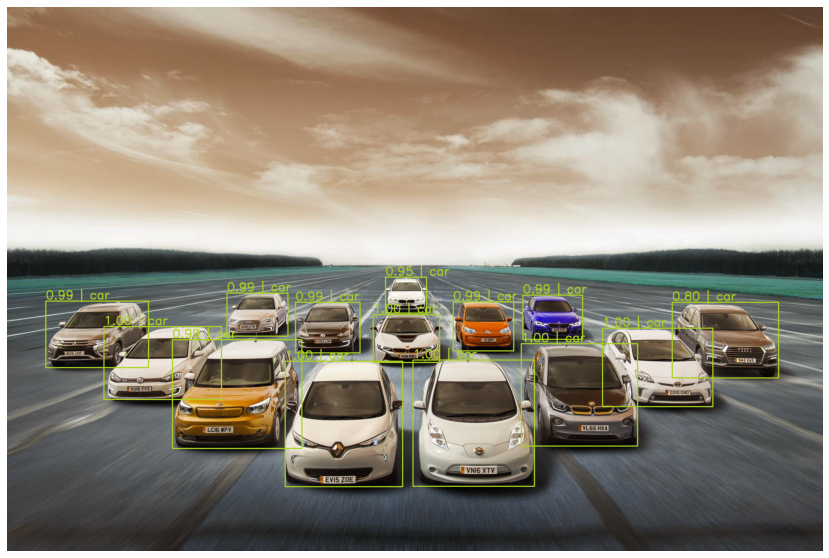

In [8]:
frame, frameHeight, frameWidth, channels = load_image(imgFile)

blob = cv2.dnn.blobFromImage(frame, scalefactor = 1 / 255.0, size = (608, 608), swapRB = True, crop = False)
net.setInput(blob)
outputs = net.forward(outputLayers)

boxes, confidences, classIds = get_box_dimensions(outputs, frameHeight, frameWidth, confThreshold)

draw_preds(boxes, confidences, confThreshold, nmsThreshold, colors, classIds, classes, frame)

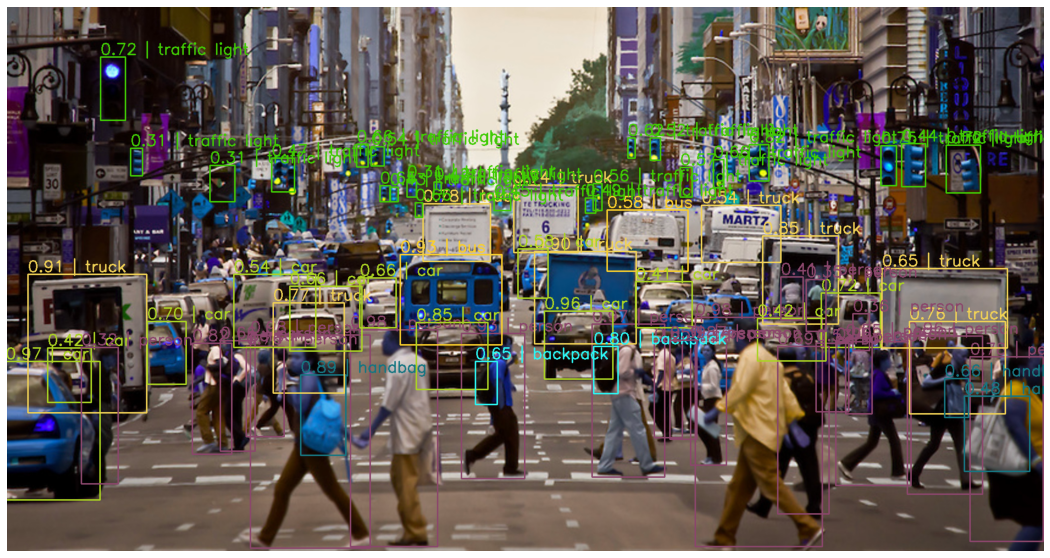

In [9]:
img, frameHeight, frameWidth, _ = load_image("busy-city.jpg")

blob = cv2.dnn.blobFromImage(img, scalefactor = 1 / 255.0, size = (608, 608), swapRB = True, crop = False)
net.setInput(blob)
outputs = net.forward(outputLayers)

boxes, confidences, classIds = get_box_dimensions(outputs, frameHeight, frameWidth, confThreshold)

draw_preds(boxes, confidences, confThreshold, nmsThreshold, colors, classIds, classes, img)

## Testing YOLOv4 on static Videos

## Testing YOLOv4 on live Camcorder